# Data processing & Visualization

## Import

In [3]:
import csv
import pandas
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
from snownlp import SnowNLP
import numpy as np

## visualize the relationship between keywords & view amount
- Top10 keywords

In [4]:
def keywordsPlay():
    f = open('result.csv','r',encoding='utf-8-sig')
    c = csv.reader(f)
    dataList = [i for i in c]
    f.close()
    print('first 10 rows:')
    print(dataList[:10])
    keywordsplayList = []
    # split keywords
    for k,data in enumerate(dataList):
        if k == 0:
            # keywordsplayList.append(data)
            continue
        keywordList = data[2].split(',')
        for value in keywordList:
            keywordsplayList.append([data[0],data[1],value,data[3],data[4],data[5]])
    pd = pandas.DataFrame(keywordsplayList,columns=[
        'author',
        'title',
        'keywords',
        'view amount',
        'length',
        'link'
    ])
    pd['view amount'] = pd['view amount'].astype('int')
    a = pd.groupby(by='keywords')['view amount'].sum().sort_values(ascending=False)
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 
    plt.title('TOP10 keywords')
    plt.bar(a.index[:10],a[:10])
    plt.xticks(rotation=30)
    plt.savefig('TOP10 keywords.png')
    plt.show()

数据集前10行:
[['author', 'title', 'keyword', 'view amount', 'length', 'link'], ['大宝剑联盟', '韩国小哥哥直接大口吃鸡腿大口喝可乐可乐肥宅真快乐', '吃货,美食,日常,美食圈,吃播,美食测评', '13734503', '19:23', 'https://www.bilibili.com/video/BV1bt411H7jv?from=search'], ['Minami_Momoko', '☆ Jimmy ☆ 哈根达斯/梦龙/好时巧克力脆皮冰淇淋、红豆雪糕棒、巧克力酥粒草莓雪糕、GooGoo脆皮雪砖、巧克力马卡龙冰淇淋三明治 食音咀嚼音（新）', '甜点,咀嚼音,美食圈,吃播,Jimmy,巧克力脆皮,巧克力冰淇淋,韩国冰淇淋,梦龙,Nutella,美食测评', '2071033', '12:55', 'https://www.bilibili.com/video/BV14E411p7j4?from=search'], ['吃货小姐姐Hamzy', '【Hamzy的今日份吃播】：麻辣香锅 &amp; 糖醋肉～配上烟台高粱酒～！', '吃货测评,Hamzy,吃货,MUKBANG,美食,韩国吃播,吃播,美食测评', '1169809', '12:35', 'https://www.bilibili.com/video/BV1h7411c7U1?from=search'], ['好多kiki酱', 'donkey弟弟吃播 灌汤包 咀嚼音 10.18', '咀嚼音,吃播,美食圈,美食,吃货,韩国,美食测评', '3343117', '19:23', 'https://www.bilibili.com/video/BV15x411M7Lz?from=search'], ['吃货小姐姐Hamzy', '【Hamzy的今日份吃播】：我的小小生日宴～！海带汤～拌杂菜～！', '美食圈,深夜食堂,MUKBANG,咀嚼音,Hamzy,日常,吃货,料理,美食,料理制作,美食制作', '899869', '13:19', 'https://www.bilibili.com/video/BV18J411p7DC?from=search'], ['吃货小姐姐Hamzy', '【Hamzy的今日份吃播】：超辣味炸鸡 &

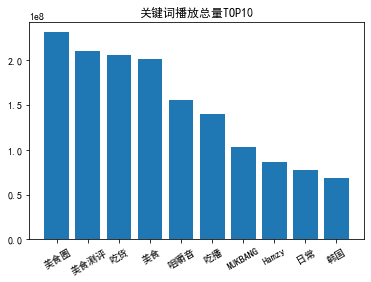

In [5]:
keywordsPlay()

## word cloud

In [4]:
def wordcloud():
    f = open('result.csv','r',encoding='utf-8-sig')
    c = csv.reader(f)
    dataList = [i for i in c]
    f.close()
    print('first 10 rows:')
    print(dataList[:10])
    text = ''
    for data in dataList:
        text += ' '.join(jieba.cut(str(data[1]), cut_all=False))
    wc = WordCloud(
        background_color='white',
        font_path="C:/Windows/Fonts/simfang.ttf",
        collocations=False,
        scale=8
    )
    wc.generate_from_text(text)
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.imshow(wc)
    plt.axis('off')
    wc.to_file("word cloud of title.jpg")
    print('success!')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\halove\AppData\Local\Temp\jieba.cache


数据集前10行:
[['author', 'title', 'keywords', 'view amount', 'length', 'link'], ['大宝剑联盟', '韩国小哥哥直接大口吃鸡腿大口喝可乐可乐肥宅真快乐', '吃货,美食,日常,美食圈,吃播,美食测评', '13734503', '19:23', 'https://www.bilibili.com/video/BV1bt411H7jv?from=search'], ['Minami_Momoko', '☆ Jimmy ☆ 哈根达斯/梦龙/好时巧克力脆皮冰淇淋、红豆雪糕棒、巧克力酥粒草莓雪糕、GooGoo脆皮雪砖、巧克力马卡龙冰淇淋三明治 食音咀嚼音（新）', '甜点,咀嚼音,美食圈,吃播,Jimmy,巧克力脆皮,巧克力冰淇淋,韩国冰淇淋,梦龙,Nutella,美食测评', '2071033', '12:55', 'https://www.bilibili.com/video/BV14E411p7j4?from=search'], ['吃货小姐姐Hamzy', '【Hamzy的今日份吃播】：麻辣香锅 &amp; 糖醋肉～配上烟台高粱酒～！', '吃货测评,Hamzy,吃货,MUKBANG,美食,韩国吃播,吃播,美食测评', '1169809', '12:35', 'https://www.bilibili.com/video/BV1h7411c7U1?from=search'], ['好多kiki酱', 'donkey弟弟吃播 灌汤包 咀嚼音 10.18', '咀嚼音,吃播,美食圈,美食,吃货,韩国,美食测评', '3343117', '19:23', 'https://www.bilibili.com/video/BV15x411M7Lz?from=search'], ['吃货小姐姐Hamzy', '【Hamzy的今日份吃播】：我的小小生日宴～！海带汤～拌杂菜～！', '美食圈,深夜食堂,MUKBANG,咀嚼音,Hamzy,日常,吃货,料理,美食,料理制作,美食制作', '899869', '13:19', 'https://www.bilibili.com/video/BV18J411p7DC?from=search'], ['吃货小姐姐Hamzy', '【Hamzy的今日份吃播】：超辣味炸鸡 

Loading model cost 1.776 seconds.
Prefix dict has been built successfully.


success!


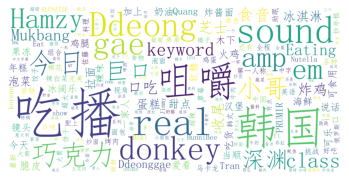

In [5]:
wordcloud()

## Sentiment analysis of the barrages
- sentiment score, [0,1], 0-negative, 1-positive

In [11]:
def nlp():
    f = open('barrage.csv','r',encoding='utf-8-sig')
    c = csv.reader(f)
    dataList = [i for i in c]
    f.close()
    print('first 10 rows:')
    print(dataList[:10])
    print('start visualizing the sentiment score')
    sentences = []
    senti_score = []
    for data in dataList:
        a1 = SnowNLP(data[0])
        a2 = a1.sentiments
        sentences.append(data[0])  
        senti_score.append(a2)  
    print('read the data, success')
    x = np.arange(0.0,1.1,0.01)
    plt.figure(2)
    plt.rcParams['font.sans-serif'] = ['SimHei']  
    plt.hist(senti_score, x)  
    plt.xticks([(i/10.0) for i in range(0,11)])
    plt.title('弹幕情感分析直方图')  
    plt.xlabel('评分分布')  
    plt.ylabel('数量')  
    plt.savefig("弹幕情感分析直方图.png")  
    plt.show()
    print('succeed')

first 10 rows:
[['我隔着屏幕都感受到了他的幸福', ''], ['卧槽，绞肉机', ''], ['好可爱哈哈哈哈哈', ''], ['我想啃他桌板', ''], ['看他那望着炸鸡不怀好意的眼神，突然觉得有些不妙', ''], ['弹幕突然出现了一群柠檬精', ''], ['我想盘他！！', ''], ['某位阎小姐默默的放下手中的烧鸭腿，点开了美团.......', ''], ['这一餐，有八只鸡失去了梦想', ''], ['emm，我收回我的不屑一顾，怀里的烧鸭腿突然就不香了', '']]
开始绘制弹幕情感分析直方图，可视化评分分布情况
数据集读入成功


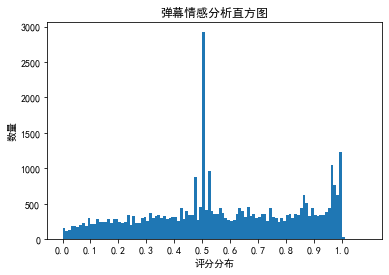

绘制弹幕情感分析直方图，可视化评分分布情况成功


In [12]:
nlp()

## draw the line gragh of comment amount & time

In [13]:
def commentsTime():
    f = open('comments.csv','r',encoding='utf-8-sig')
    c = csv.reader(f)
    dataList = [i for i in c]
    f.close()
    print('数据集前10行:')
    print(dataList[:10])
    x = [i for i in range(1,25)]
    y = [0 for i in range(1,25)]
    for data in dataList:
        mytime = int(data[1].split(' ')[1].split(':')[0])
        # 2020-11-22 08:20:00  --> 8
        y[mytime] += 1
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置图片显示中文字符
    plt.plot(x,y,marker='o')
    plt.title('每个时段评论数量折线图')
    for a, b in zip(x, y):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=9)
    plt.xticks([i for i in range(1,25)])
    plt.savefig('每个时段评论数量折线图.png')
    plt.show()

数据集前10行:
[['哈哈哈他吃鸡腿咋跟削铅笔一样', '2019-01-15 14:23:32'], ['牙齿:什么东西过去了。舌头:不知道。喉咙:哇好多。胃:上面的能不能加工一下。(〜￣△￣)〜', '2019-01-25 22:01:13'], ['这一餐起码有八只鸡失去了他们的梦想', '2019-01-19 10:38:58'], ['开始他笑，我以为是幸福满足的意思，但是我越看越不对劲，这贱贱的笑容分明在说：“我来吃，你看着就行，我就是在故意馋你！”……', '2019-01-20 19:41:50'], ['这个吃播粗旷到我有点害怕和他对视......', '2019-01-15 11:06:14'], ['时至深夜，这些B\n\n站首页推荐人员就露出了他们丑恶的嘴脸', '2019-01-22 01:36:56'], ['我这么吃东西估计会被我妈打死，哈哈哈哈', '2019-01-15 11:47:03'], ['原来动画里一嘴唆掉一个鸡腿都是真的。。。', '2019-03-29 22:53:12'], ['这个很像我的室友在正在减肥的我面前吃东西的样子……', '2019-01-30 23:30:49'], ['有没有哪位勇士和我一样是凌晨看这个视频的', '2019-01-17 01:24:10']]


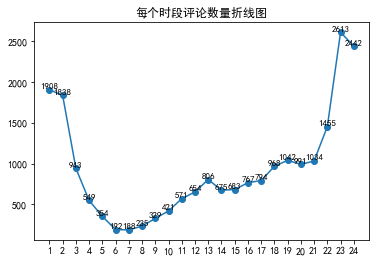

In [14]:
commentsTime()

## barrage categories

In [15]:
def typeDM():
    f = open('barrage.csv','r',encoding='utf-8-sig')
    c = csv.reader(f)
    dataList = [i for i in c]
    f.close()
    print('数据集前10行:')
    print(dataList[:10])
    one = '长得,美,丑,身材,胖,肥,瘦,苗条,身高,性感,可爱,眉毛,' \
          '眼睛,鼻子,耳朵,睫毛,嘴,头发,胳膊,腿,手,脚,腰,胸,屁股,臀,欧派'.split(',')
    two = '好吃,不好吃,想吃,香,诱人,可口,美食,多,油,油腻,热量,恶心,' \
          '呕,吐,这也能吃,不敢吃,不健康垃圾食品,鸡腿,汉堡,方便面,火鸡面,' \
          '火腿,玉米,薯片,巧克力,冰淇淋,披萨,炸鸡,鸡翅,鸡腿海鲜,螃蟹,蟹腿,' \
          '龙虾,虾,扇贝,鸡,鸭,鱼,猪,牛肉,兔口水,馋,饿'.split(',')
    three = '听上去,听起来,好听,听着,空耳咔,沙沙'.split(',')
    four = '哥哥,姐姐,弟弟,妹妹,老公,老婆,女朋友,女票,男朋友,男票,' \
           '小心,当心,心疼,注意,催吐,厉害,了不起,优秀,爱了,佩服,讨厌,' \
           '烦,变态,爱看,不爱看,来了,打卡,报到,晚安,有人吗,' \
           '么么,亲,awsl,xswl'.split(',')
    xTicks = ['主播长相','食物本身','吃东西的声音','社交性话语','其他']
    y = [0 for i in range(5)]
    for data in dataList:
        tag = False
        for i in one:
            if i in data[0]:
                y[0] += 1
                tag = True
        for i in two:
            if i in data[0]:
                y[1] += 1
                tag = True
        for i in three:
            if i in data[0]:
                y[2] += 1
                tag = True
        for i in four:
            if i in data[0]:
                y[3] += 1
                tag = True
        if not tag:
            y[4] += 1
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置图片显示中文字符
    plt.pie(x=y,labels=xTicks,autopct='%.3f%%')
    plt.savefig('弹幕关注点分类.png')
    plt.show()

数据集前10行:
[['我隔着屏幕都感受到了他的幸福', ''], ['卧槽，绞肉机', ''], ['好可爱哈哈哈哈哈', ''], ['我想啃他桌板', ''], ['看他那望着炸鸡不怀好意的眼神，突然觉得有些不妙', ''], ['弹幕突然出现了一群柠檬精', ''], ['我想盘他！！', ''], ['某位阎小姐默默的放下手中的烧鸭腿，点开了美团.......', ''], ['这一餐，有八只鸡失去了梦想', ''], ['emm，我收回我的不屑一顾，怀里的烧鸭腿突然就不香了', '']]


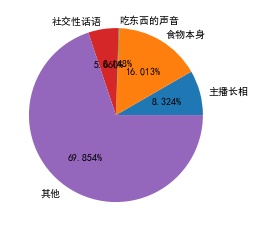

In [16]:
typeDM()